# Prophet 

https://facebookincubator.github.io/prophet/

- ### Installation 
https://facebookincubator.github.io/prophet/docs/installation.html

- ### Quick start 
https://facebookincubator.github.io/prophet/docs/quick_start.html

> Setup script exited with Cython>=0.22 and NumPy are required.

In [2]:
# Python
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [21]:
df = pd.read_csv('./data/example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])

In [22]:
df.tail()

,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


In [4]:
m = Prophet()
m.fit(df);

In [12]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [13]:
%%time
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

CPU times: user 13.4 s, sys: 376 ms, total: 13.8 s
Wall time: 11.2 s


In [14]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.213787,7.491141,8.952771
3266,2017-01-16,8.538876,7.852577,9.304616
3267,2017-01-17,8.326293,7.615767,9.055915
3268,2017-01-18,8.158930,7.443913,8.916587
3269,2017-01-19,8.170898,7.475035,8.945291


In [24]:
forecast.tail()

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat
3265,2017-01-15,1.121836,7.195772,1.018015,1.018015,6.857527,7.576324,7.491141,8.952771,0.048265,0.048265,0.048265,0.969750,0.969750,0.969750,1.018015,8.213787
3266,2017-01-16,1.122173,7.194756,1.344120,1.344120,6.855102,7.576879,7.852577,9.304616,0.352314,0.352314,0.352314,0.991806,0.991806,0.991806,1.344120,8.538876
3267,2017-01-17,1.122511,7.193741,1.132552,1.132552,6.852530,7.577748,7.615767,9.055915,0.119636,0.119636,0.119636,1.012916,1.012916,1.012916,1.132552,8.326293
3268,2017-01-18,1.122848,7.192725,0.966205,0.966205,6.849740,7.578677,7.443913,8.916587,-0.066672,-0.066672,-0.066672,1.032877,1.032877,1.032877,0.966205,8.158930
3269,2017-01-19,1.123186,7.191709,0.979189,0.979189,6.846992,7.579680,7.475035,8.945291,-0.072254,-0.072254,-0.072254,1.051443,1.051443,1.051443,0.979189,8.170898


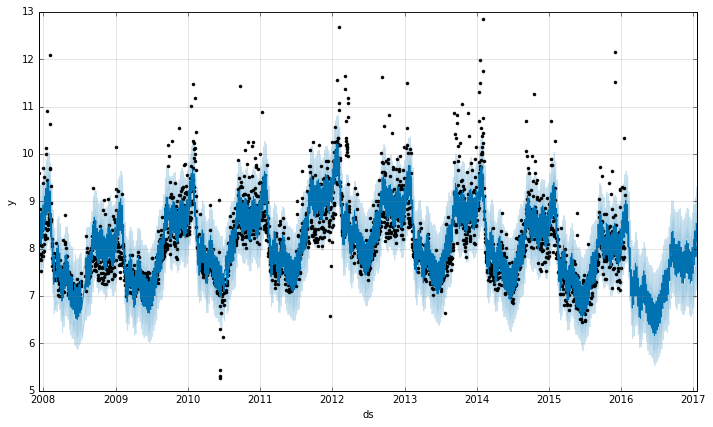

In [25]:
m.plot(forecast)

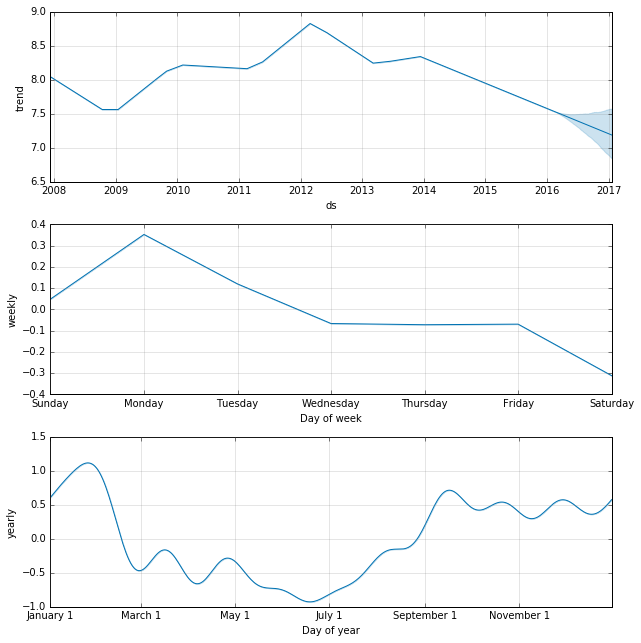

In [26]:
m.plot_components(forecast)